# Homework4 [Project] 
#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/26 (Tues)  11:59 PM [NO LATE HAND IN(Late hand in will get 0), because of school grade policy]

### In this assignment, you will design, implement, and evaluate the appropriate models for given data.
- __This is project assignment. We can not reply your questions about technical(code) issues.__
- __이번 과제는 프로젝트 과제입니다. 소스코드와 같은 기술적인 질문에는 답변 드릴 수 없습니다.__

<br>
<br>
*Perform the steps described below for each dataset(2 Project).*
>0. Preprocess; normalization, feature selection, etc.
>1. Model selection; characteristics of datasets need to be comprehended.
>2. Evaluation; This step should be done properly to prevent overfitting problem.
>3. Enhancement; parameter tuning and feature selection, etc.

### When you make your model for this Project, you should use scikit learn. Don't use other ML package.
### Of course you can use any packages for handling your data. (pandas, numpy, matplotlib, random etc.)
### Download your data in *https://www.dropbox.com/sh/6s4e0z9fhenfw6z/AADkJO3Z6WN1b8IJhkVp9KgDa?dl=0*

## Project 1
### h1b data [h1b_train, h1b_dev, h1b_test]

- Use h1b __train data__ for train your model.
- Tune your model with __dev data__.
- Finally check your best performed model score with __test data__.
- __*You should clean your train dev test data first!!*__
- Score function : Accuracy
<br>
<br>
- __Your goal is to predict CASE_STATUS, using other features.__
- You can choose the features you want to use in your project.

### Attribute Information

- __CASE_STATUS__
    - The CASE_STATUS field denotes the status of the application after LCA processing. Certified applications are filed with USCIS for H-1B approval.
<br>
<br>
- EMPLOYER_NAME
    - Name of the employer submitting labor condition application.
<br>
<br>
- SOC_NAME
    - Occupational name associated with the SOC_CODE. SOC_CODE is the occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.
<br>
<br>
- JOB_TITLE
    - Title of the job.
<br>
<br>
- FULL_TIME_POSITION
    - Y = Full Time Position; N = Part Time Position.
<br>
<br>
- PREVAILING_WAGE
    - Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
<br>
<br>
- YEAR
    - Year in which the H-1B visa petition was filed.
<br>
<br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('h1b_train.csv',index_col=None)

AttributeError: 'DataFrame' object has no attribute 'description'

In [4]:
train

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1349742,CERTIFIED,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
1,789205,CERTIFIED,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
2,1617140,CERTIFIED,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
3,2757905,CERTIFIED,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
4,1127948,WITHDRAWN,VALUE SOFTWARE PRODUCTS INC,COMPUTER SYSTEMS ANALYSTS,SOLUTIONS ARCHITECT,Y,71614.0,2015.0,"MANASSAS, VIRGINIA",-77.475267,38.750949
5,693102,DENIED,"UNIVERSITY OF CALIFORNIA, SAN DIEGO","MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,Y,42120.0,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811
6,2662510,CERTIFIED,GOOGLE INC.,"Computer Software Engineers, Applications",SOFTWARE ENGINEER,Y,82035.0,2011.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052
7,636434,CERTIFIED,"COMPREHAB, INC.",PHYSICAL THERAPISTS,PHYSICAL THERAPIST,N,64168.0,2016.0,"GASTONIA, NORTH CAROLINA",-81.187301,35.262082
8,2265757,CERTIFIED,JPMORGAN CHASE AND CO.,"Software Developers, Applications",APPLICATIONS DEVELOPER,Y,92726.0,2012.0,"COLUMBUS, OHIO",-82.998794,39.961176
9,2927315,CERTIFIED,"IRONBRIDGE CONSULTING, LLC","Information Security Analysts, Web Developers,...",SOFTWARE ENGINEER/ NETWORK ANALYST,Y,57866.0,2011.0,"ARLINGTON, VIRGINIA",-77.106770,38.879970


In [3]:
train=pd.read_csv('h1b_train.csv',index_col=None)
train['FULL_TIME_POSITION']=train['FULL_TIME_POSITION'].replace({'Y':1,'N':0})
train=train[['CASE_STATUS','FULL_TIME_POSITION','PREVAILING_WAGE','YEAR','lon','lat']]
dev=pd.read_csv('h1b_dev.csv',index_col=None)
dev['FULL_TIME_POSITION']=dev['FULL_TIME_POSITION'].replace({'Y':1,'N':0})
dev=dev[['CASE_STATUS','FULL_TIME_POSITION','PREVAILING_WAGE','YEAR','lon','lat']]
test=pd.read_csv('h1b_test.csv',index_col=None)
test['FULL_TIME_POSITION']=test['FULL_TIME_POSITION'].replace({'Y':1,'N':0})
test=test[['CASE_STATUS','FULL_TIME_POSITION','PREVAILING_WAGE','YEAR','lon','lat']]

In [4]:
for row in train.index:
    if(train.loc[row,'lon']=='NA'):
        train=train.drop(row)
for row in train.index:
    if(train.loc[row,'lat']=='NA'):
        train=train.drop(row)
train=train.dropna()
train_x=train[['FULL_TIME_POSITION','PREVAILING_WAGE','YEAR','lon','lat']]
train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())
train_y=train['CASE_STATUS']

In [5]:
for row in test.index:
    if(test.loc[row,'lon']=='NA'):
        test=test.drop(row)
for row in test.index:
    if(test.loc[row,'lat']=='NA'):
        test=test.drop(row)
test=test.dropna()
test_x=test[['FULL_TIME_POSITION','PREVAILING_WAGE','YEAR','lon','lat']]
test_x=(test_x-test_x.min())/(test_x.max()-test_x.min())
test_y=test['CASE_STATUS']

In [6]:
for row in dev.index:
    if(dev.loc[row,'lon']=='NA'):
        dev=dev.drop(row)
for row in dev.index:
    if(dev.loc[row,'lat']=='NA'):
        dev=dev.drop(row)
dev=dev.dropna()
dev_x=dev[['FULL_TIME_POSITION','PREVAILING_WAGE','YEAR','lon','lat']]
dev_x=(dev_x-dev_x.min())/(dev_x.max()-dev_x.min())
dev_y=dev['CASE_STATUS']

data 전처리과정으로 우선 NA와 np.nan으로 된 row를 걸러주고 몇 coloumn(feature)들을 고른 후 normalize시켰다.<br>
여기서 feature는 총 5개를 골라주었다.<br>
이 전처리를 train, dev, test모두에게 해주었다.

In [7]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2")
sgd.fit(train_x,train_y)
sgdScore = sgd.score(dev_x,dev_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.873060


In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rfScore = rf.score(dev_x,dev_y)
print ("Model Accuracy: %f" % rfScore)

Model Accuracy: 0.383808


In [7]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(train_x,train_y)
mlpScore = mlp.score(dev_x,dev_y)
print ("Model Accuracy: %f" % mlpScore)

Model Accuracy: 0.873063


In [9]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(train_x,train_y)
lgScore = lg.score(dev_x,dev_y)
print ("Model Accuracy: %f" % lgScore)

Model Accuracy: 0.873063


다른모델을 더 실험해보았으나 너무 train하는데 너무 오래 걸려 제외하고 그나마 적게 걸리는 것을 해보았다.
그 결과 SGD, MLP, LogisticRegression 셋의 결과가 비슷하게 나와 parameter를 바꾸어 한번더 해보았다.

In [8]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l1",alpha=0.00005)
sgd.fit(train_x,train_y)
sgdScore = sgd.score(dev_x,dev_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.873062


In [9]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(penalty='l1',tol=0.00005)
lg.fit(train_x,train_y)
lgScore = lg.score(dev_x,dev_y)
print ("Model Accuracy: %f" % lgScore)

Model Accuracy: 0.873063


In [10]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(alpha=0.00005)
mlp.fit(train_x,train_y)
mlpScore = mlp.score(dev_x,dev_y)
print ("Model Accuracy: %f" % mlpScore)

Model Accuracy: 0.873063


바꾸어도 여전히 비슷하여 가장 빠른 sgd를 썼다. 그 후 hyperparameter와 parameter setting 과정에 들어갔다.

feature 4개 사용시 => year제거!

In [13]:
train_x2=train[['FULL_TIME_POSITION','PREVAILING_WAGE','lon','lat']]
dev_x2=dev[['FULL_TIME_POSITION','PREVAILING_WAGE','lon','lat']]

In [15]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l1",alpha=0.00005)
sgd.fit(train_x2,train_y)
sgdScore = sgd.score(dev_x2,dev_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.858829


feature를 많이 쓴 것이 효율이 좋아 5개 쓰리고 하고 parameter를 정하려 한다.

In [20]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2",alpha=0.00005,epsilon=0.05)
sgd.fit(train_x,train_y)
sgdScore = sgd.score(dev_x,dev_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.873062


In [29]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="squared_hinge", penalty="l2",warm_start=True)
sgd.fit(train_x,train_y)
sgdScore = sgd.score(dev_x,dev_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.873577


In [30]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="perceptron", penalty="l2",warm_start=True)
sgd.fit(train_x,train_y)
sgdScore = sgd.score(dev_x,dev_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.863252


In [74]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2",warm_start=True,fit_intercept=True)
sgd.fit(train_x,train_y)
sgdScore = sgd.score(dev_x,dev_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.873060


In [75]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2",warm_start=True,epsilon=0.2)
sgd.fit(train_x,train_y)
sgdScore = sgd.score(dev_x,dev_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.873060


In [76]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2",warm_start=True,epsilon=0.2,power_t=0.1)
sgd.fit(train_x,train_y)
sgdScore = sgd.score(dev_x,dev_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.873060


In [62]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2",warm_start=True,n_iter=5,l1_ratio=0.25)
sgd.fit(train_x,train_y)
sgdScore = sgd.score(dev_x,dev_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.873599


여러 방법을 해보았을 때 큰 변화는 없지만 마지막에 하였을때가 가장 성능이 좋았다.<br>
바꾸기 전보다 0.0005만큼 accuracy가 증가하였고 마지막으로 testcase를 넣어보려 한다.

In [77]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2",warm_start=True,n_iter=5,l1_ratio=0.25)
sgd.fit(train_x,train_y)
sgdScore = sgd.score(test_x,test_y)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.872906


반대로 test를 했을경우 0.0006만큼 accuracy가 감소하였다.<br>
따라서 혹시나 하는 마음에 LogisticRegression을 test해보았는데 큰 차이는 아니지만 더 좋은 결과를 얻을 수 있었다.

In [78]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(train_x,train_y)
lgScore = lg.score(test_x,test_y)
print ("Model Accuracy: %f" % lgScore)

Model Accuracy: 0.873294


결과로 두 accuracy의 차이가 미세하므로 조금 더 빠른 모델을 사용하고 싶다면 SGD 조금이라도 더 좋은 모델을 사용하고 싶다면 LogisticRegression을 사용하면 될 것이다. 정확도는 두 모델 다 0.873정도로 나왔다.

## Project 2
### AAAI Accepted Papers

- Cluster papers using AAAI Accepted Papers data [use __'title'__ as primary key].
- Visualize your clustering result and explain it.
<br>
<br>
- __Your goal is to show clustering result with AAAI Accepted Papers.__
- __You must use 'abstract' feature.__ 
- You can choose the features you want to use in your project.

### Attribute Information

- __Title__
    - Free text; title of the paper 
<br>
<br>
- Groups
    - Categorical; author-selected, high-level keyword(s) 
<br>
<br>
- Keywords
    - Free text; author-generated keywords 
<br>
<br>
- Topics
    - Free text; author-selected, low-level keywords 
<br>
<br>
- __Abstracts__
    - Free text; paper abstracts

In [79]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [80]:
tsv = pd.read_csv('AAAI_Accepted_Papers.csv',index_col=None,encoding='ISO-8859-1')

In [84]:
tsv

,title,groups,keywords,topics,abstract
0,The cascade auction ??a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Multiagent Systems,Auctions and Market-Based Systems\nE-Commerce\...,We introduce a sealed bid auction of a single ...
1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Machine Learning\nReasoning under Uncertainty,Dimension Reduction/Feature Selection\nOnline ...,This paper presents a new approach to basis ad...
2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Multiagent Systems,Coordination and Collaboration\nGame Theory,Representation languages for coalitional game...
3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search and Optimization,Heuristic Search\nEvaluation and Analysis (Sea...,Multiple sequence alignment (MSA) is a central...
4,Posted Prices Exchange for Display Advertising...,Display Advertising\nDynamic Pricing\nMarket E...,Multiagent Systems,Auctions and Market-Based Systems\nE-Commerce\...,We propose a new market design for display adv...
5,Gradient Networks for Shape-Based Object Insta...,object detection\ninstance detection\nshape\ng...,Robotics,"Vision, Object Recognition, and Perception",We present a novel framework for shape-based t...
6,Unified Constraint Propagation on Multi-View Data,pairwise constraint propagation\nsemi-supervis...,Machine Learning,Relational/Graph-Based Learning\nSemisupervise...,This paper presents a unified framework for in...
7,Progression of Decomposed Situation Calculus T...,reasoning about actions\ndecomposition of logi...,Knowledge Representation and Reasoning,"Action, Change, and Causality",In many tasks related to reasoning about conse...
8,How to Cut a Cake Before the Party Ends,Cake cutting\nFair division\nComputational soc...,Multiagent Systems,Mechanism Design\nSocial Choice / Voting,For decades researchers have struggled with th...
9,Reciprocal Hash Tables for Nearest Neighbor Se...,locality sensitive hashing\nnearest neighbor s...,Heuristic Search and Optimization\nKnowledge-B...,Search (General/Other)\nInformation Retrieval\...,Recent years have witnessed the success of has...


In [107]:
tsv.iloc[:,0]

0      The cascade auction ??a mechanism for deterrin...
1      Basis Adaptation for Sparse Nonlinear Reinforc...
2      Optimal Coalition Structures in Cooperative Gr...
3      External Memory Best-First Search for Multiple...
4      Posted Prices Exchange for Display Advertising...
5      Gradient Networks for Shape-Based Object Insta...
6      Unified Constraint Propagation on Multi-View Data
7      Progression of Decomposed Situation Calculus T...
8                How to Cut a Cake Before the Party Ends
9      Reciprocal Hash Tables for Nearest Neighbor Se...
10                          Automated Workflow Synthesis
11     Video Saliency Detection via Dynamic Consisten...
12            Symmetry-Aware Marginal Density Estimation
13     Improving WalkSAT for Random $k$-Satisfiabilit...
14     A Generalized Student-t Based Approach to Mixe...
15      Causal Transportability with Limited Experiments
16     Rank Aggregation via Low-rank and Structured-s...
17     Computational Aspects of

In [133]:
tsv.iloc[:,-1]

0      We introduce a sealed bid auction of a single ...
1      This paper presents a new approach to basis ad...
2      Representation  languages for coalitional game...
3      Multiple sequence alignment (MSA) is a central...
4      We propose a new market design for display adv...
5      We present a novel framework for shape-based t...
6      This paper presents a unified framework for in...
7      In many tasks related to reasoning about conse...
8      For decades researchers have struggled with th...
9      Recent years have witnessed the success of has...
10     By coordinating efforts from humans and machin...
11     Human vision system actively seeks salient reg...
12     Concepts from the field of statistics are leve...
13     Stochastic local search (SLS) algorithms are w...
14     Anomaly detection for mixed-type data is an im...
15     We address the problem of transferring causal ...
16     Rank aggregation, which combines multiple indi...
17     Manipulation, bribery, a

nan을 drop한후 tfidf를 이용하여 matrix를 구현 하였다. 여기서 예로 feature로 title, abstract, groups를 골랐다.<br>
matrix1은 title, matrix2는 abstract, matrix3=,groups에 해당한다.

In [126]:
tsv=tsv.dropna()
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix1 = tfidf_vectorizer.fit_transform(tsv.iloc[:,0])
tfidf_matrix1

<542x1593 sparse matrix of type '<class 'numpy.float64'>'
	with 4431 stored elements in Compressed Sparse Row format>

In [127]:
tfidf_matrix2 = tfidf_vectorizer.fit_transform(tsv.iloc[:,-1])
tfidf_matrix2

<542x6656 sparse matrix of type '<class 'numpy.float64'>'
	with 51418 stored elements in Compressed Sparse Row format>

In [199]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix1)
clusters = km.labels_.tolist()
print(clusters)

[2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 

In [200]:
num_clusters = 3
km2 = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix2)
clusters2 = km.labels_.tolist()
print(clusters2)

[2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 

In [201]:
if(clusters==clusters2):
    print(True)
else:
    print(False)

True


In [202]:
tfidf_matrix3 = tfidf_vectorizer.fit_transform(tsv.iloc[:,1])
tfidf_matrix3
num_clusters = 3
km = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix3)
clusters3 = km.labels_.tolist()
print(clusters3)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 

In [203]:
if(clusters==clusters3):
    print(True)
else:
    print(False)

False


신기하게도 tfidf_matrix를 구하면 title과 abstract의 경우 matrix가 같게 나오고 groups의 경우 다르게 나와 위의 문제에서 제시된 title과 abstract를 모두 이용하면 tfidf_matrix1으로 써도 됨을 알았다. 이 경우 title과 abstract만 고려한 것이다.

다음으로는 cluster의 수를 확인해 보려한다.

In [204]:
def clusters_distr(tfidf_matrix1):
    for num_clusters in range(2,10):
        km = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix1)
        clusters = km.labels_.tolist()
        print('# of clusters:',num_clusters)
        for i in range(0,num_clusters):
            print(i,':' ,clusters.count(i))
clusters_distr(tfidf_matrix1)

# of clusters: 2
0 : 446
1 : 96
# of clusters: 3
0 : 243
1 : 83
2 : 216
# of clusters: 4
0 : 294
1 : 87
2 : 117
3 : 44
# of clusters: 5
0 : 72
1 : 72
2 : 177
3 : 129
4 : 92
# of clusters: 6
0 : 100
1 : 142
2 : 32
3 : 61
4 : 99
5 : 108
# of clusters: 7
0 : 95
1 : 77
2 : 32
3 : 61
4 : 88
5 : 92
6 : 97
# of clusters: 8
0 : 87
1 : 110
2 : 56
3 : 107
4 : 49
5 : 22
6 : 82
7 : 29
# of clusters: 9
0 : 60
1 : 60
2 : 75
3 : 86
4 : 64
5 : 71
6 : 34
7 : 45
8 : 47


다음으로 분포 그림을 여러 cluster에 대해서 그려 보았는데 다른경우보다 5일때가 가장 적절하게 너무 세부적으로 나뉘지도 않고 너무 안나뉘는 것도 아니여서 선택하였다.

In [216]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix1)
clusters = km.labels_.tolist()
print(clusters)

[3, 1, 3, 4, 4, 4, 1, 3, 3, 4, 2, 0, 2, 0, 2, 0, 2, 3, 3, 3, 3, 2, 0, 2, 0, 2, 4, 0, 2, 3, 4, 0, 1, 3, 3, 2, 0, 3, 2, 3, 2, 2, 1, 4, 0, 3, 0, 3, 3, 2, 3, 1, 2, 0, 0, 2, 1, 4, 3, 3, 2, 2, 0, 0, 3, 1, 4, 3, 4, 2, 4, 2, 1, 3, 0, 3, 4, 2, 4, 3, 1, 4, 2, 2, 2, 4, 3, 2, 2, 1, 2, 2, 0, 2, 2, 3, 3, 0, 3, 4, 4, 4, 0, 1, 1, 4, 1, 2, 0, 0, 4, 2, 4, 4, 2, 4, 3, 1, 3, 2, 2, 3, 4, 0, 3, 0, 0, 4, 1, 2, 1, 0, 1, 2, 3, 0, 3, 4, 3, 4, 2, 0, 2, 1, 3, 2, 2, 4, 2, 0, 1, 1, 2, 2, 4, 2, 0, 2, 3, 1, 4, 4, 1, 3, 2, 3, 3, 4, 1, 2, 3, 3, 4, 1, 4, 4, 4, 4, 2, 2, 3, 4, 3, 1, 2, 3, 4, 4, 1, 0, 2, 3, 4, 2, 2, 3, 2, 1, 0, 4, 3, 2, 2, 2, 3, 2, 2, 3, 2, 0, 2, 3, 4, 2, 2, 2, 2, 3, 2, 2, 4, 2, 1, 3, 2, 0, 3, 3, 3, 3, 4, 2, 1, 4, 2, 3, 1, 3, 2, 1, 1, 2, 2, 2, 3, 4, 1, 3, 2, 3, 2, 2, 2, 3, 2, 4, 3, 2, 1, 2, 2, 3, 0, 2, 2, 4, 2, 2, 1, 1, 3, 0, 1, 2, 3, 4, 2, 3, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 3, 0, 2, 1, 4, 4, 2, 3, 2, 1, 2, 1, 0, 2, 3, 3, 2, 3, 3, 2, 0, 2, 2, 3, 4, 4, 2, 2, 0, 2, 3, 3, 3, 2, 2, 4, 2, 3, 4, 4, 3, 2, 

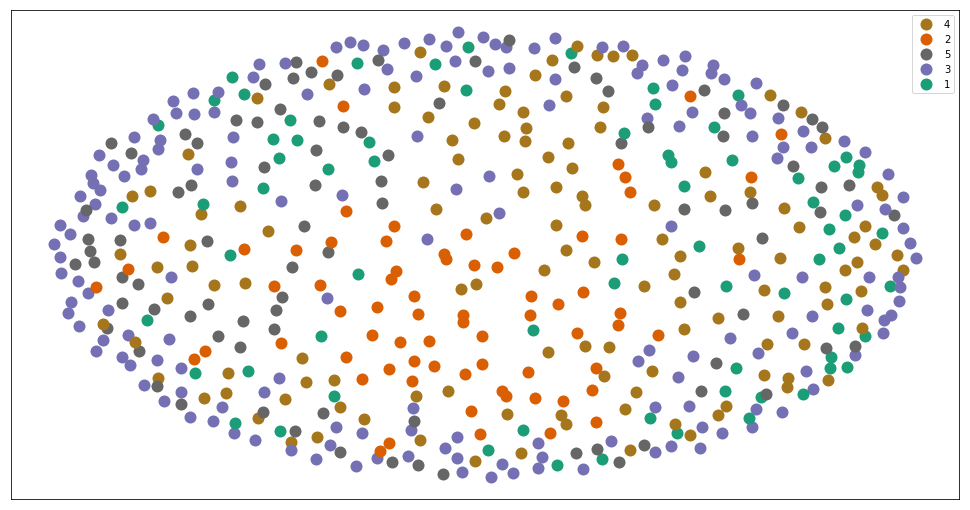

In [217]:
dist = 1 - cosine_similarity(tfidf_matrix1)
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3',3:"#a6761d",4: "#666666",
                  5:"#e6ab02",6: "#e7298a",7: "#66a61e"}
cluster_names = [1,2,3,4,5,6,7,8]

def visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors,ln):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
    name=df['label'].tolist()
    groupx=df['x'].tolist()
    groupy=df['y'].tolist()
    groups=zip(name,groupx,groupy)
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05) 
    for name, groupx,groupy in groups:
        ax.plot(groupx, groupy, marker='o', linestyle='', ms=12, 
                label= cluster_names[name] if name not in ln else '', 
                color= cluster_colors[name], 
                mec='none')
        if name not in ln:
            ln.append(name)
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show() 

visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors,[])

세부설명은 위를 보면되고 결론으로 title과 abstract feature를 이용하여 5개의 cluster로 구분하였고 그때의 분포는 다음과 같다.

# FIN
## You did a really good job for the short semester. Have a nice vacation!! :) 